# Part 2: Resampling and confidence intervall

In [1]:
import numpy as np
import algorithms
from model_selection0 import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison0 import model_comparison0
from model_resample0 import model_resample
from utils import generateDesignmatrix, franke_function, ci, plotCI, clean_reg_coeff
from scipy import stats
import scipy.stats as st
import matplotlib.pyplot as plt
from imageio import imread
%matplotlib notebook 
# creates the toolbars with zoom buttons on plots.

## Franke function 

In [2]:
np.random.seed(1000)
x = np.random.rand(1000, )
y = np.random.rand(1000, )
z = franke_function(x, y)
p = 5 
X = generateDesignmatrix(p,x,y)

In [3]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}

lmd = {
    'ridge': [0.01], 
    'ols': [0], 
    'lasso': [0.01]
}
nboots = 100

In [26]:
mse_avg_test, r2_avg_test, reg_coeffs, bias_model_test, mv_test, mse_avg_train, r2_avg_train,  bias_model_train,  mv_train = model_resample(models, lmd, X, z, nboots, split_size = 0.2)

/home/hanna/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<IPython.core.display.Javascript object>


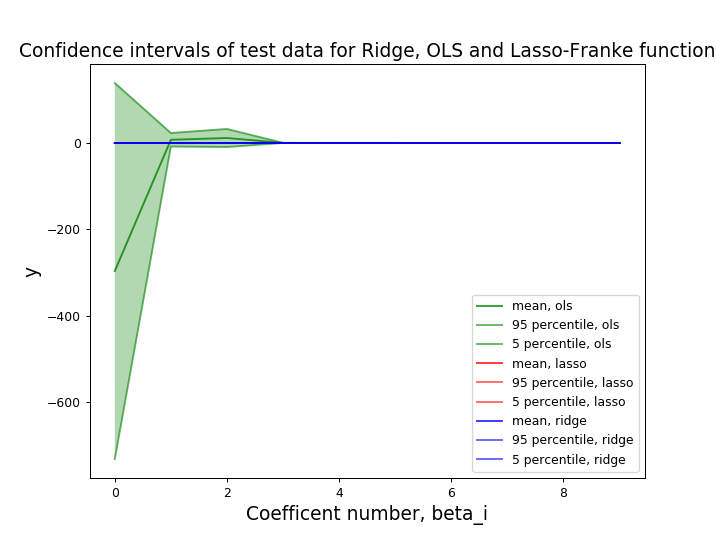

In [27]:
a,b,c, d, e, f, g, h, i = clean_reg_coeff(X, reg_coeffs, nboots)
plotCI(X, a,b,c, d, e, f, g, h, i)
plt.title("Confidence intervals of test data for Ridge, OLS and Lasso-Franke function", fontsize = 15)
plt.savefig("Confidenceintervall_Franke.png")
plt.show()

In [6]:
mse_avg_test, mse_avg_train
# train has a lower value than test. OK!

({'lasso': 0.019595883202549146,
  'ols': 0.0022940737824749024,
  'ridge': 0.004854363938292805},
 {'lasso': 0.12368692531099422,
  'ols': 0.16383489914112048,
  'ridge': 0.1580596395394527})

In [7]:
r2_avg_test, r2_avg_train 
# train is higher than test. OK!

({'lasso': 0.7281995625603058,
  'ols': 0.9681805483758703,
  'ridge': 0.9326686004258373},
 {'lasso': -0.49593918565501327,
  'ols': -0.9815113439581463,
  'ridge': -0.9116621086914236})

In [8]:
bias_model_test, bias_model_train

({'lasso': 0.0016246348318261772,
  'ols': 0.00507861738500387,
  'ridge': 0.0031132691621157393},
 {'lasso': 0.0015817609288932277,
  'ols': 0.0015817609237128716,
  'ridge': 0.001593305120698496})

In [9]:
mv_test, mv_train

({'lasso': 5.10702591327572e-17,
  'ols': -1.283417816466681e-15,
  'ridge': 2.9309887850104134e-16},
 {'lasso': -4.1855408028368405e-15,
  'ols': -7.549516567451065e-17,
  'ridge': -4.32542890393961e-15})

## Real data: Flekkefjord 

In [10]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}

lmd = {
    'ridge': [0.01], 
    'ols': [0], 
    'lasso': [0.01]
}
nboots = 100

In [11]:
terrain_F = imread("Flekkefjord.tif")

lengthx = 100
lengthy = 100
x = np.linspace(1, lengthx, num=lengthx)
y = np.linspace(1+80, lengthy+80, num=lengthy)

#x = np.arange(lengthx)
#y = np.arange(lengthy)

x = np.squeeze(np.tile(x, [1,100]))
y = np.squeeze(np.tile(y, [1,100]))
z = np.ndarray.flatten(terrain_F)
p = 3 
X = generateDesignmatrix(p, x, y)
print(X.shape)

(10000, 10)


/home/hanna/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/hanna/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/hanna/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/hanna/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'reverse_bitorder'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))


In [12]:
mse_avg_test, r2_avg_test, reg_coeffs, bias_model_test, mv_test, mse_avg_train, r2_avg_train,  bias_model_train,  mv_train   = model_resample(
    models, lmd, X, z, nboots, split_size = 0.2)

/home/hanna/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [13]:
a,b,c, d, e, f, g, h, i = clean_reg_coeff(X, reg_coeffs, nboots)

<IPython.core.display.Javascript object>


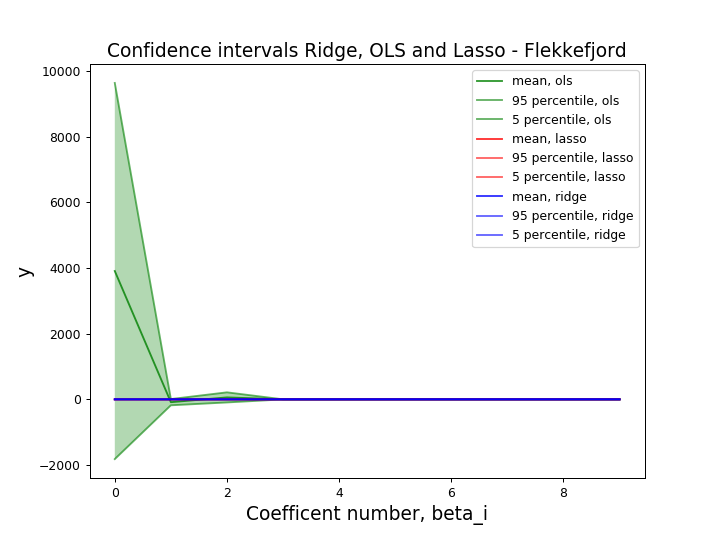

In [14]:
%matplotlib notebook
plotCI(X, a,b,c, d, e, f, g, h, i)
plt.title("Confidence intervals Ridge, OLS and Lasso - Flekkefjord", fontsize = 15)
plt.savefig("Confidenceintervall_F.png")
plt.show()

In [15]:
mse_avg_test, mse_avg_train

({'lasso': 143371.62853138332,
  'ols': 22540458934.767242,
  'ridge': 147067.28695532103},
 {'lasso': 139131.25323867728,
  'ols': 22929722765.306538,
  'ridge': 143173.52662565096})

In [16]:
r2_avg_test, r2_avg_train

({'lasso': 0.0013882307170220375,
  'ols': -156997.7577589041,
  'ridge': -0.024352761661997877},
 {'lasso': -0.004170034510992009,
  'ols': -165492.6613060314,
  'ridge': -0.03334485836984744})

In [17]:
bias_model_test, bias_model_train

({'lasso': 272.5456474089958,
  'ols': 9494.411686354451,
  'ridge': 282.1379906278943},
 {'lasso': 273.0617667730777,
  'ols': 9521.36905855667,
  'ridge': 282.82838507426584})

In [18]:
# model variance
mv_test, mv_train

({'lasso': 2.5114559321082197e-11,
  'ols': -2.3166649043560028e-10,
  'ridge': 6.923528417246416e-12},
 {'lasso': 3.127865966234822e-11,
  'ols': 9.115319699048996e-09,
  'ridge': -9.880409379547928e-11})

## Real data: Montevideo

In [19]:
terrain_M = imread("Montevideo.tif")

x = np.linspace(1, lengthx, num=lengthx)
y = np.linspace(1+80, lengthy+80, num=lengthy)

#x = np.arange(lengthx)
#y = np.arange(lengthy)

x = np.squeeze(np.tile(x, [1,100]))
y = np.squeeze(np.tile(y, [1,100]))
z = np.ndarray.flatten(terrain_F)
p = 3
X = generateDesignmatrix(p, x, y)
z = np.ndarray.flatten(terrain_M)

#mse_M, r2_M, reg_coeffs_M, bias_M, model_variance_M

mse_avg_test, r2_avg_test, reg_coeffs, bias_model_test, mv_test, mse_avg_train, r2_avg_train,  bias_model_train,  mv_train   = model_resample(
    models, lmd, X, z, nboots, split_size = 0.2)

/home/hanna/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<IPython.core.display.Javascript object>


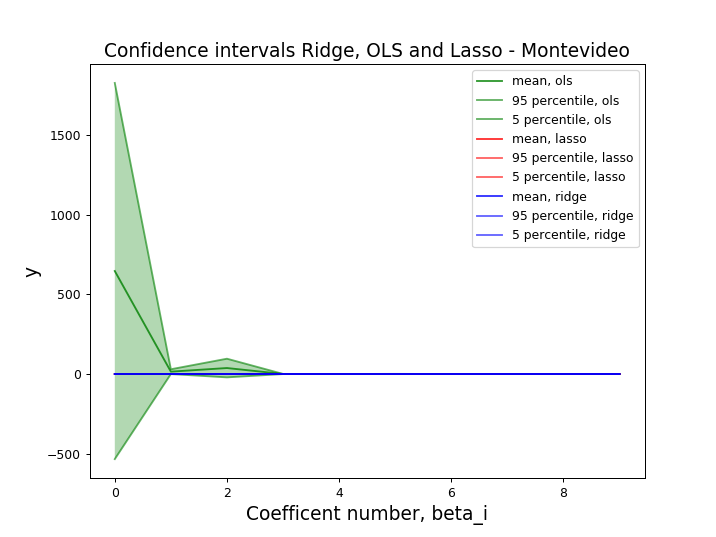

In [20]:
a,b,c, d, e, f, g, h, i = clean_reg_coeff(X, reg_coeffs, nboots)
"""
a - mean ridge 
b - ci high 
c - ci lox

2. ols
3. lasso
"""

%matplotlib notebook
plotCI(X, a,b,c, d, e, f, g, h, i)
plt.title("Confidence intervals Ridge, OLS and Lasso - Montevideo", fontsize = 15)
plt.savefig("Confidenceintervall_M.png")
plt.show()

In [21]:
mse_avg_test, mse_avg_train

({'lasso': 451.577322207588,
  'ols': 8826314628.020174,
  'ridge': 582.778038504644},
 {'lasso': 481.58804443592715,
  'ols': 8781032589.99698,
  'ridge': 612.9986632225604})

In [22]:
r2_avg_test, r2_avg_train

({'lasso': -0.00011829098368189906,
  'ols': -19547833.3737596,
  'ridge': -0.29069142144422105},
 {'lasso': -0.000964808742193678,
  'ols': -18251084.566919,
  'ridge': -0.27409742991123087})

In [23]:
bias_model_test, bias_model_train

({'lasso': 60.27255978840128,
  'ols': 10224.576797605372,
  'ridge': 58.79929914371651},
 {'lasso': 60.2888937450937,
  'ols': 10189.602050710793,
  'ridge': 58.815346098791395})

In [24]:
mv_test, mv_train

({'lasso': 4.884270765614928e-13,
  'ols': 1.3061799108982087e-09,
  'ridge': -3.865352482534945e-14},
 {'lasso': 4.879581183558912e-12,
  'ols': 2.7514033718034623e-09,
  'ridge': -4.067146619490813e-12})